In [ ]:
import timeit
import pandas as pd
import seaborn as sns
import graspologic
from graspologic.simulations import er_np
from graspologic.plot import heatmap
from graspologic.utils import utils as gus
import networkx as nx

import matplotlib.pyplot as plt
import numpy as np

In [2]:
n_verts = []
time_orig = []
time_scipy = []

In [3]:
for N in range(50, 1001, 50):
    for _ in range(15):
        
        n_verts.append(N)
        B = nx.MultiDiGraph()
        for n in range(0, N):
            for m in range(0, N):
                B.add_edge(n, m)
        
        #make the node at index [N-1] only connect to self
        for i in range(N-1):
            B.remove_edge(i, N-1)
            B.remove_edge(N-1, i)
        
          
        #get time for original is_fully_connected
        start_time = timeit.default_timer()
        gus.is_fully_connected(B)
        elapsed_orig = timeit.default_timer() - start_time
        time_orig.append(elapsed_orig)
        
        #get time for scipy is_fully_connected
        start_time = timeit.default_timer()
        gus.scipy_is_fully_connected(B)
        elapsed_scipy = timeit.default_timer() - start_time
        time_scipy.append(elapsed_scipy)
        
        print('done {}'.format(N))

done 50
done 50
done 50
done 50
done 50
done 50
done 50
done 50
done 50
done 50
done 50
done 50
done 50
done 50
done 50
done 100
done 100
done 100
done 100
done 100
done 100
done 100
done 100
done 100
done 100
done 100
done 100
done 100
done 100
done 100
done 150
done 150
done 150
done 150
done 150
done 150
done 150
done 150
done 150
done 150
done 150
done 150
done 150
done 150
done 150
done 200
done 200
done 200
done 200
done 200
done 200
done 200
done 200
done 200
done 200
done 200
done 200
done 200
done 200
done 200
done 250
done 250
done 250
done 250
done 250
done 250
done 250
done 250
done 250
done 250
done 250
done 250
done 250
done 250
done 250
done 300
done 300
done 300
done 300
done 300
done 300
done 300
done 300
done 300
done 300
done 300
done 300
done 300
done 300
done 300
done 350
done 350
done 350
done 350
done 350
done 350
done 350
done 350
done 350
done 350
done 350
done 350
done 350
done 350
done 350
done 400
done 400
done 400
done 400
done 400
done 400
done 400
done 40

In [4]:
print(time_orig)

[0.00030737599999941523, 0.00022798799999979025, 0.0003830179999999572, 0.0001868130000000079, 0.00017381699999940992, 0.00017892199999991476, 0.00017435200000015527, 0.00015970799999998064, 0.00017735100000049187, 0.00016965299999949224, 0.00016468099999933372, 0.00016637399999996916, 0.0001726230000000939, 0.00016932299999972145, 0.00016795199999997124, 0.00043290099999993004, 0.00043648300000054263, 0.00045420600000056766, 0.0005089319999997954, 0.0004864810000002606, 0.0004438639999992944, 0.000825548999999981, 0.0006841639999999316, 0.0009031769999996442, 0.0007316780000001799, 0.00041520800000061087, 0.00041082100000000565, 0.0004966899999994112, 0.0004905820000002947, 0.00047669900000002485, 0.0008016370000003548, 0.001400731000000377, 0.0009421910000000366, 0.0007989990000005776, 0.0008230079999993478, 0.0008028270000011162, 0.0007984899999993189, 0.0008457760000002423, 0.0007979259999988386, 0.000858996999999917, 0.0008434800000003406, 0.0008569009999987998, 0.0008506560000007

In [5]:
print(time_scipy)

[0.0063333210000005025, 0.0035694820000005123, 0.002828429000000021, 0.0030498019999996018, 0.0024580820000004167, 0.0028758670000001985, 0.0024709080000002714, 0.0025788860000002245, 0.002577710999999816, 0.002690519000000613, 0.002662689000000107, 0.002551152000000556, 0.0030517459999996888, 0.05080225299999963, 0.0027825129999996534, 0.010714601000000101, 0.009485403000000225, 0.05905875299999952, 0.010124659000000591, 0.009330971999999882, 0.009720738000000395, 0.016822988999999566, 0.014414921000000191, 0.015419768999999306, 0.011946513999999908, 0.009726249999999936, 0.009148429999999763, 0.010280936000000018, 0.009834840999999983, 0.011629205000000198, 0.024486145000000015, 0.07509169300000007, 0.025733035000000015, 0.021753606999999953, 0.02299618899999878, 0.07883377199999941, 0.07359853600000044, 0.022843049000000448, 0.021623884999998566, 0.07422306199999973, 0.022723193999999225, 0.07314963299999988, 0.07634707799999951, 0.023131657999998723, 0.020967025000000916, 0.0511852

In [6]:
time_orig_dict = {"time_orig": time_orig, "n_verts": n_verts}
df_orig = pd.DataFrame(data = time_orig_dict)

In [7]:
time_scipy_dict = {"time_scipy": time_scipy, "n_verts": n_verts}
df_scipy = pd.DataFrame(data = time_scipy_dict)

Text(0.5, 1.0, 'Times for original vs new is_fully_connected')

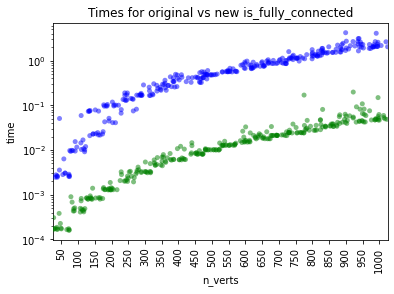

In [8]:
ax1 = sns.stripplot(data=df_orig,
    x="n_verts",
    y="time_orig",
    jitter = 0.5,
    alpha = 0.5,
    size=5,
    color='green'
)

ax2 = sns.stripplot(data=df_scipy,
    x="n_verts",
    y="time_scipy",
    jitter = 0.5,
    alpha = 0.5,
    size=5,
    color='blue'
)
ax1.set_yscale('log')
plt.xticks(rotation='vertical')
plt.ylabel('time')
plt.title("Times for original vs new is_fully_connected")